# Binary Decision-Making and Error Rates

Many real-world data science problems boil down to making binary decisions:
* Given the outcome of a medical test for a particular disease, does someone have that disease?
* Given the results of experimenting with a new version of my website, does that version increase the chances that a customer will stay on my website longer and/or buy something?
* Is there a "statistically significant" association between this pair of variables in my dataset?

We'll focus on the case of making a binary (0/1) decision. For each decision, we'll assume there's some *Reality* or truth that's either 0 or 1. We gather data, and make a binary *Decision* based on the data: the decision is our best guess for reality. We'll  abbreviate Reality and Decision with $R$ and $D$ respectively. Since both are binary, we can visualize all possible outcomes using a 2 x 2 table:


| | $D=0$ | $D=1$ |
| --- | --- | --- |
|$R=0$ |  |  |
|$R=1$ |  |  |

Each decision we make must fall into one of the four cells of this table. In most real-world settings, we don't actually know which *row* our decision lands up in: we know whether we decided $D=0$ or $D=1$ (i.e., which column it's in), but we don't know the state of reality.

This kind of table is often called a **confusion matrix**. There isn't a standard convention about whether to put reality in the rows or columns, so you may see them flipped in other places. In this book, we'll always use reality in the rows and the decision in the columns.

We use the following names for each of the four cases: **true positive** (TP), **false positive** (FP), **true negative** (TN), and **false negative** (FN). 

| | $D=0$ | $D=1$ |
| --- | --- | --- |
|$R=0$ |   $TN$   |   $FP$   |
|$R=1$ |   $FN$   |   $TP$   |

The first word in each name tells us whether or not the decision was correct ("true") or incorrect ("false"). The second word tells us whether the decision was a 1 ("positive") or 0 ("negative").

Ideally, our decisions would always match reality, and land in the top left (true negatives) or bottom right (false positives) cells of our table. In the real world, this is not always possible: we may make errors. Depending on the problem, we may prefer to avoid one kind of error more than the other. In the rest of this section, we'll define several different ways to quantify the errors we make, and understand the relationship between them.

## Making multiple decisions

Suppose now that we make multiple decisions, and we want to look at all of them collectively. There are several ways this situation could arise:

*Testing multiple hypotheses on a single dataset*: we could be interested in asking multiple questions from a single dataset. For example, suppose we examine a genomics dataset in an Alzheimer's study. For each of thousands of genetic markers, we would like to ask whether a mutation at that location is associated with a higher risk of Alzheimer's.

*Testing one hypothesis on multiple datasets*: suppose we're interested in studying whether there is an association between the use of statin drugs and the rate of heart attacks. We could conduct a meta-analysis of many studies that look at this question: each study tests the same hypothesis (i.e., is taking statin drugs associated with lower risk of heart attack?) with a different set of subjects. By looking at the studies as a collection, we can try to draw a stronger conclusion about the presence (or absence) of such a link.

### Modifying the 2x2 table

When we make multiple decisions, we may have multiple false positives, true negatives, and so on. So, we'll use the same 2x2 table, but now each cell will contain a count of how many times that condition happened:

| | $D=0$ | $D=1$ |
| --- | --- | --- |
| $R=0$ | $n_{00}$ | $n_{01}$ |
| $R=1$ | $n_{10}$ | $n_{11}$ |

For example, $n_{01}$ is the number of times reality was 0 and we made a decision of 1.

There are many ways to quantify how well (or how badly) our decisions match up with reality. In this book, we'll focus on **row-wise rates**, which quantify our performance in each row (i.e., when reality is 0 and when reality is 1), and **column-wise rates**, which quantify our performance in each column (i.e., when the decision is 0 or the decision is 1).


### Row-wise rates: quantifying how well we do when reality is known

Suppose we want to evaluate how good our decision-making process is in cases where reality is 0. In this case, we're interested in the top row of the 2x2 table above. In particular, we can quantify how often we're correct in this situation using the fraction $\frac{n_{00}}{n_{00} + n_{01}}$. We'll call this row-wise rate the **true negative rate** (TNR): it quantifies how often we make true negative decisions in cases where reality is 0.

We can also evaluate our decision-making process in cases where reality is 1. In this case, we can quantify how often we're correct using $\frac{n_{11}}{n_{10} + n_{11}}$. This is called the **true positive rate** (TPR): it measures how often we make true positive decisions in cases where reality is 0.

We can define corresponding **error rates** for the two cases above, which we'll call false positive rate (FPR) and false negative rate (FNR):

$$
FPR = \frac{n_{01}}{n_{00} + n_{01}} \\
FNR = \frac{n_{10}}{n_{10} + n_{11}}
$$

We can visualize these rates with the rows that they correspond to in our 2x2 table:

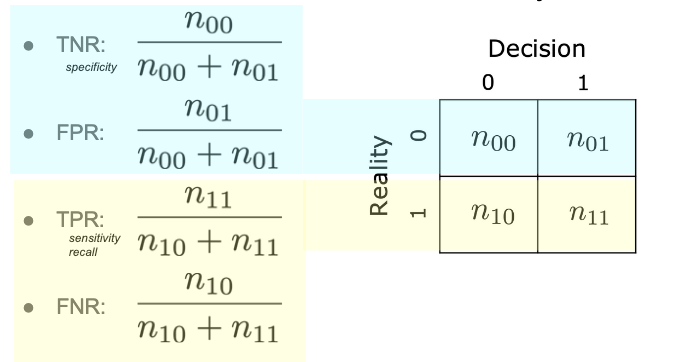

As an example, suppose we're predicting whether or not a customer will buy a product. In this case, 0 corresponds to a customer not buying, and 1 corresponds to the customer buying. Here's how we'd interpret the four rates defined above:

* TNR: when the customer **did not** buy the product, how often did we (correctly) predict that they would not?
* FPR: when the customer **did not** buy the product, how often did we (incorrectly) predict that they would buy it?
* TPR: when the customer **did** buy the product, how often did we (correctly) predict that they would buy it?
* FNR: when the customer **did** buy the product, how often did we (incorrectly) predict that they would not?

### Column-wise rates

Row-wise rates measure how well we do in each case of reality: in other words, in each row of the table. We can also quantify our performance when we make specific decisions. We'll focus on the **false discovery proportion** (FDP), which quantifies how often we're wrong when we make a decision of 1:

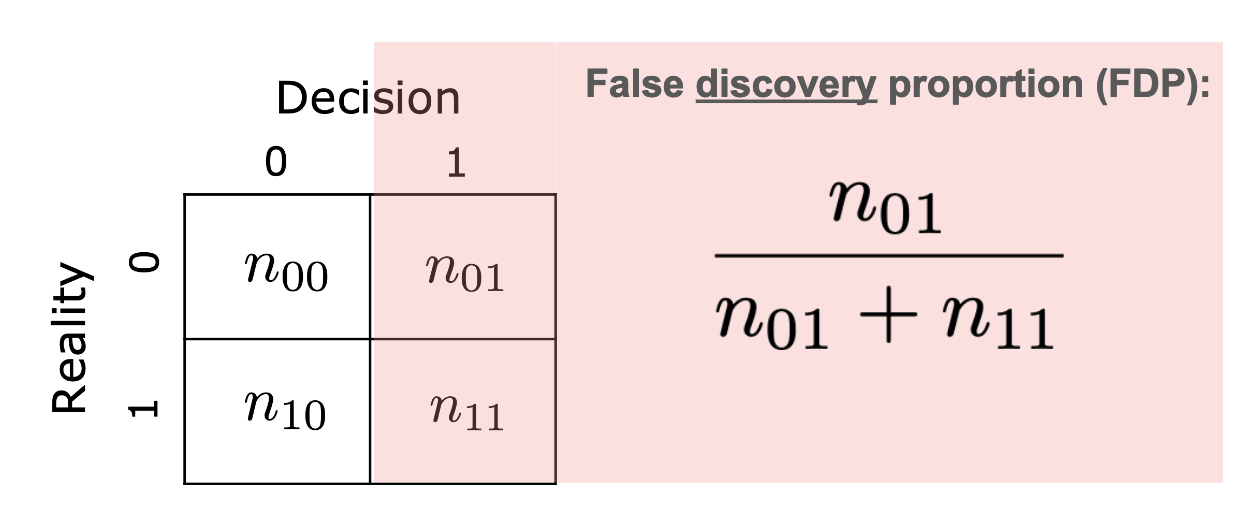

We also define the **false omission proportion** (FOP), which quantifies how often we're wrong when we make a decision of 0:

$$
FOP = \frac{n_{10}}{n_{00} + n_{10}}
$$

For each of these two, we can define their opposites (true omission proportion and true discovery proportion), but these are rarely called by these names.

Returning to our product purchase prediction example, here's how we'd interpret the column-wise rates:

* FDP: when we predicted the customer **would buy** the product, how often did they end up not buying it?
* FOP: when we predicted the customer **would not buy** the product, how often did they end up buying it?

Throughout this book, we'll focus primarily on FDP as the column-wise rate we're most interested in.

### Example: interpreting row-wise and column-wise rates

Suppose we're testing a large number of patients for a disease. We'll use 1 to indicate that a patient has the disease, and 0 to indicate that they don't. This corresponds to standard medical terminology, where a "positive" test indicates that we think someone has the disease, while a "negative" test means we think they don't have it.

Let's interpret some of the definitions we've learned for this specific example. Recall that for this example, a **false positive** occurs when the test comes back positive (i.e., the test says the patient has the disease), but the patient is healthy. 

* The false positive rate (FPR) is the percentage of healthy patients that test positive. It tells us: **when we test healthy patients, how often is the test wrong?**
* The false negative rate (FNR) is the percentage of sick patients that test negative. It tells us: **when we test sick patients, how often is the test wrong?**
* The false discovery proportion (FDP) is the percentage of positive tests that are from healthy patients. It tells us: **when the test results are positive, how often are they wrong?**
* The false omission proportion (FOR) is the percentage of negative tests that are from sick patients. It tells us: **when the test results are negative, how often are they wrong?**

Intuitively, the row-wise error rates (FPR and FNR) describe properties of the test itself: they tell us how well the test does on healthy patients and sick patients, respectively. As a specific example, the COVID-19 rapid (antigen) tests have an estimated FPR of 0.2% and an FNR of 38% for the Omicron BA.1 variant ([source](https://www.medrxiv.org/content/10.1101/2022.06.13.22276325v1)). The FPR and FNR are a property of the testing technique and the disease itself, and are the same regardless of whether the test is used during a surge in cases or during a low period (fewer cases), as long as the test technology and variant are the same.

On the other hand, the column-wise rates must depend on the population. As a specific example, let's examine the FDP for COVID-19 rapid (antigen) tests. During a lull, when the virus is less common in the population, we should expect a relatively small number of people with COVID, and a relatively large number of healthy patients. This means that some moderate percentage of positive tests will be incorrect (false positives), and so our FDR could be moderately high. But during a surge in cases, many more people are sick, and we should expect more of the positive tests to come from people with COVID rather than healthy people. Therefore, our FDP will be lower, even if the test itself stays exactly the same.

Next, we'll quantify this intuition for the relationship between row-wise rates and column-wise rates.

### Conditional probabilities

Each of the rates defined above was based on the idea of limiting ourselves to half of the table. In the case of row-wise rates, we defined quantities based on looking only at $R=0$ (FPR and TNR) or $R=1$ (TPR and FNR). In the case of column-wise rates, we defined FDP based only on $D=1$.

This idea, of making computations based on a limited set of outcomes, should be familiar: it's an idea you've likely seen before when thinking about conditional probabilities. Consider events $A$ and $B$. While $P(A)$ describes the probability that event $A$ occurs, $P(A|B)$ describes the conditional probability of event $A$ given event $B$: in other words, if we restrict ourselves to the case where event $B$ has occurred, what is the probability of event $A$ occuring?

From this idea, we can interpret our row-wise rates as conditional probabilities. Since each is defined within a particular case for reality, we know that they are probabilities of particular decisions conditioned on reality: for example, the true positive rate (TPR) is $P(D=1|R=1)$. 

Similarly, the false positive rate (FPR), which measures how often our answers are incorrect ($D=1$) when reality is 0 ($R = 0$), can be interpreted as the conditional probability $P(D=1|R=0)$.

Column-wise rates, on the other hand, are defined conditioned on a particular decision. The false discovery proportion, which looks at our positive decisions ($D=1$) and measures how often they are incorrect ($R=0$), can be interpreted as the conditional probability $P(R=0|D=1)$. Similarly, the false omission proportion (FOP) is $P(R=1|D=0)$.

To summarize:



| Error rate | Conditional probability |
| :-- |  --- |
| **True negative rate (TNR)** | $P(D=0|R=0)$
| **False positive rate (FPR)** | $P(D=1|R=0)$
| **True positive rate (TPR)** | $P(D=1|R=1)$
| **False negative rate (FNR)** | $P(D=0|R=1)$
| **False discovery proportion (FDP)** | $P(R=0|D=1)$
| **False omission proportion (FOP)** | $P(R=1|D=0)$

Interpreting these row-wise and column-wise rates as conditional probabilities is useful because it lets us apply everything we know about conditional probability to better our understanding of these rates. Earlier, with our COVID-19 testing example, we explored an intuitive connection between the row-wise rates and column-wise rates, and introduced the idea that the connection also depends on how common "$R=1$" is. We can formalize this intuition by applying Bayes' rule.

### Relating row-wise and column-wise error rates

Consider the false discovery proportion (FDP), $P(R=0|D=1)$ and false positive rate (FPR), $P(D=1|R=0)$. In order to quantify the connection between them, we can apply Bayes' rule. As we'll see, the connection depends on how common it is for reality to be "1". We'll call this quantity the **prevalence** or **base rate**, and use the notation $\pi_1$: $\pi_1 = P(R=1)$. We'll also define $\pi_0 = P(R=0) = 1 - \pi_1$.

Now we can quantify the relationship between these two rates that we began exploring earlier. We'll use Bayes' rule and the law of total probability:

$$
\begin{align*}
FDP 
&= P(R=0|D=1) \\
{\scriptsize{\text{(using Bayes' rule)}}} &= \frac{P(D=1|R=0)P(R=0)}{P(D=1)} \\ 
{\scriptsize{\text{(Law of total probability)}}} &= \frac{P(D=1|R=0)P(R=0)}{P(D=1|R=0)P(R=0) + P(D=1|R=1)P(R=1)} \\
{\scriptsize{\text{(applying definitions)}}} &= \frac{FPR \cdot \pi_0}{FPR \cdot \pi_0 + TPR \cdot \pi_1} \\
{\scriptsize{\text{(dividing by the numerator)}}} &= \frac{1}{1 + \frac{TPR}{FPR} \frac{\pi_1}{\pi_0}}
\end{align*}
$$

For a refresher on calculations like these, you can refer to [Section 2.5 of the Data 140 textbook](http://prob140.org/textbook/content/Chapter_02/05_Updating_Probabilities.html).

### Example: relating row-wise and column-wise rates quantitatively

Suppose we're trying to build a model that predicts whether or not it will rain. To ensure it performs well, we'll apply our algorithm in Berkeley (where it almost never rains in the summer) and in Miami, FL (where it rains about half the time in the summer).

You work with a team of data scientists, and one of them provides you with a good prediction model: on days that it rains, the model gets it right $97\%$ of the time, and on days that it doesn't rain, the model gets it right $96\%$ of the time. You present the model to a meteorologist, who tells you that the question they're really interested in is: **when the model predicts rain, how often is it right**? This is important for people to trust the model: if the model's rainy-day predictions are mostly incorrect, then people won't believe it.

We start by interpreting these three quantities into the framework that we've already built up. We'll use 1 to indicate rain, and 0 to indicate no rain. 

* "on days that it rains, the model gets it right $97\%$ of the time": this is a row-wise rate describing how well we do when $R=1$. In other words, this tells us that $TPR=0.97$ (and $FNR = 1 - TPR = 0.03$.

* "on days that it doesn't rain, the model gets it right $96\%$ of the time": this is a row-wise rate describing how well we do when $R=0$. In other words, this tells us that $TNR=0.96$ (and $FPR = 1 - TNR = 0.04$).

* "when the model predicts rain, how often is it right?": this is a column-wise rate describing how well we do when $D=1$. In other words, the meteorologist is interested in minimizing the FDP.

So, in order to meet the meteorologist's requirements, we need to compute the FDP from the quantities that the data scientists have provided us. This is precisely what the computation above using Bayes' rule tells us. We'll start by defining a function to compute FDP from TPR, FPR, and prevalence:

In [2]:
# Uses the formula derived above
def compute_fdp(tpr, fpr, prevalence):
    return 1 / (1 + (tpr/fpr) * (prevalence/(1-prevalence)))

miami_prevalence = 0.5
berkeley_prevalence = 0.01

What is the FDP for the model when used in Miami?

In [4]:
miami_fdp = compute_fdp(tpr=0.97, fpr=0.04, prevalence=miami_prevalence)
miami_fdp

0.039603960396039604

This is quite small: in Miami, when we predict rain, we can expect to be right about $96\%$ of the time. What about in Berkeley?

In [5]:
berkeley_fdp = compute_fdp(tpr=0.97, fpr=0.04, prevalence=berkeley_prevalence)
berkeley_fdp

0.8032454361054766

This tells us that in Berkeley in the summer, when we predict rain with this model, we can expect to be right only about $20\%$ of the time. Even though our model is over $95\%$ accurate in each case, the low prevalence of rain in Berkeley means that we have very few rainy days. This means that we have lots of opportunities for false positives (on dry days), and very few opportunities for true positives (on rainy days). Therefore, our false discovery proportion is quite high.

We can also see this by analyzing the asymptotic behavior of the equation above:

$$
FDP = \frac{1}{1 + \frac{TPR}{FPR} \frac{\pi_1}{\pi_0}}
$$

* As the prevalence $\pi_1$ becomes very small, the fraction $\pi_1/\pi_0$ approaches 0, and the FDP approaches $1/(1+0) = 1$.
* As the prevalence $\pi_1$ becomes close to 1, the fraction $\pi_1/\pi_0$ approaches $\infty$, and the FDP approaches 0.

Similarly, we can see that larger values of the true positive rate (TPR) and smaller values of the false positive rate (FPR) lead to a lower false discovery proportion (FDP).

### Different error types: is one worse than the other?

False positives and false negatives are both errors. In general, we'd like to make as few errors as possible, but as we'll see later, we often end up in situations where we must trade off between making more false positives and fewer false negatives, or vice versa. In such cases, it's important to understand which one is preferable (or "less bad").

For example: suppose Spotify is trying to predict which customers will renew their subscriptions (1 corresponds to renewing, 0 corresponds to not renewing). For customers predicted to not renew, they plan to send a $1 coupon off their next month's subscription. In this case:

* A false positive corresponds to predicting a customer will renew (and therefore not sending a coupon), but then the customer doesn't renew (and Spotify loses a customer paying $10 per month, every month).

* A false negative corresponds to predicting a customer won't renew (and therefore sending them a coupon), but then the customer would have renewed anyway (and so the coupon was unnecessary, costing Spotify $1).

In this example, we could probably argue that a false positive is worse than a false negative: a false negative means that they wasted $1, but a false positive means that they lost a paying customer who they might have been able to retain with a coupon.